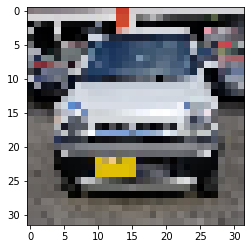

1/1 [==============================] - 0s 690us/step
airplane= 0
automobile= 99
bird= 0
cat= 0
deer= 0
dog= 0
frog= 0
horse= 0
ship= 0
truck= 0


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2
import numpy as np


(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.to_categorical(y_test.astype('int32'), 10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.load_weights('cifar10-weight.h5')
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
im = cv2.imread('test-car.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im)
plt.show()

image = im.astype('float32') / 255
res = model.predict(np.array([image]), batch_size=32, verbose=1)
r = res[0]
for i, acc in enumerate(r):
    print(labels[i]+"=", int(acc*100))
    
print("----")
print(labels[r.argmax()])